## The contents include:

* 1. The SNP association analysis
* 2. Running association scans for SNPs
* 3. The whole genome SNP association analysis

## 1. The SNP association analysis

GWAS is used to identify genetic variants associated with a disease phenotype. It's performed by statistical analysis of the GWAS data. To perform the SNP association analysis, we take the data built in package `SNPsocc` as an example.

In [2]:
BiocManager::install("SNPassoc")
library(SNPassoc)
data(SNPs)               # load the data
table1 <- head(SNPs)               # take a look at the objects
table1
table2 <- head(SNPs.info.pos)
table2 

Bioconductor version 3.9 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'SNPassoc'

also installing the dependencies 'polspline', 'rms', 'haplo.stats'




package 'polspline' successfully unpacked and MD5 sums checked
package 'rms' successfully unpacked and MD5 sums checked
package 'haplo.stats' successfully unpacked and MD5 sums checked
package 'SNPassoc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Master\AppData\Local\Temp\Rtmpktwtnd\downloaded_packages


Old packages: 'BH', 'bit', 'caTools', 'cli', 'FactoMineR', 'fansi', 'farver',
  'GetoptLong', 'ggridges', 'gplots', 'hms', 'knitr', 'leaps', 'multcomp',
  'mvtnorm', 'PMA', 'precrec', 'prettyunits', 'pROC', 'RCurl', 'RSQLite',
  'Rttf2pt1', 'shinyjs', 'stringi', 'tinytex', 'xfun', 'XML', 'xts', 'zoo'

Loading required package: haplo.stats

Loading required package: survival

Loading required package: mvtnorm

Loading required package: parallel

Registered S3 method overwritten by 'SNPassoc':
  method            from       
  summary.haplo.glm haplo.stats



,id,casco,sex,blood.pre,protein,snp10001,snp10002,snp10003,snp10004,snp10005,...,snp100026,snp100027,snp100028,snp100029,snp100030,snp100031,snp100032,snp100033,snp100034,snp100035
,<int>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,1,Female,13.7,75640.52,TT,CC,GG,GG,GG,...,GG,CC,CC,GG,AA,TT,AA,AA,TT,TT
2,2,1,Female,12.7,28688.22,TT,AC,GG,GG,AG,...,GG,CG,CT,GG,AA,TT,AG,AG,TT,TT
3,3,1,Female,12.9,17279.59,TT,CC,GG,GG,GG,...,GG,CC,CC,GG,AA,TT,AA,AA,TT,TT
4,4,1,Male,14.6,27253.99,CT,CC,GG,GG,GG,...,GG,CC,CT,AG,AA,TT,AG,AG,CT,TT
5,5,1,Female,13.4,38066.57,TT,AC,GG,GG,GG,...,GG,CG,CT,GG,AA,TT,AG,AG,TT,TT
6,6,1,Female,11.3,9872.46,TT,CC,GG,GG,GG,...,GG,CC,CC,GG,AA,TT,AA,AA,TT,NA


,snp,chr,pos
,<fct>,<fct>,<dbl>
1,snp10001,Chr1,2987398
2,snp10002,Chr1,1913558
3,snp10003,Chr1,1982067
4,snp10004,Chr1,447403
5,snp10005,Chr1,2212031
6,snp10006,Chr1,2515720


The SNP data is a data.frame object that consists of 157 rows and 40 columns. Each row of the data represents a sample that is either a case or control. The first five columns represent the attributes for each sample and the columns from 6:40 are the SNP information. That is why we used these columns while creating the SNP class object. The first five columns are for sample identifiers, for case or control identification (1 is for case and 0 is for control, which means casco). This is followed by information about the blood pressure and protein level of each gender. The table1 shows the first six entries of the SNP data.<br>

Table2 shows information about the SNP name, chromosome name, and genomic position.

In [3]:
## Create an `SNP` object using the `setupSNP` function with the `SNP` information in columns 6 to 40
mySNP <- setupSNP(SNPs, 6:40, sep="")
head(mySNP)

,id,casco,sex,blood.pre,protein,snp10001,snp10002,snp10003,snp10004,snp10005,...,snp100026,snp100027,snp100028,snp100029,snp100030,snp100031,snp100032,snp100033,snp100034,snp100035
,<int>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,1,Female,13.7,75640.52,T/T,C/C,G/G,G/G,G/G,...,G/G,C/C,C/C,G/G,A/A,T/T,A/A,A/A,T/T,T/T
2,2,1,Female,12.7,28688.22,T/T,A/C,G/G,G/G,A/G,...,G/G,C/G,C/T,G/G,A/A,T/T,A/G,A/G,T/T,T/T
3,3,1,Female,12.9,17279.59,T/T,C/C,G/G,G/G,G/G,...,G/G,C/C,C/C,G/G,A/A,T/T,A/A,A/A,T/T,T/T
4,4,1,Male,14.6,27253.99,C/T,C/C,G/G,G/G,G/G,...,G/G,C/C,C/T,A/G,A/A,T/T,A/G,A/G,C/T,T/T
5,5,1,Female,13.4,38066.57,T/T,A/C,G/G,G/G,G/G,...,G/G,C/G,C/T,G/G,A/A,T/T,A/G,A/G,T/T,T/T
6,6,1,Female,11.3,9872.46,T/T,C/C,G/G,G/G,G/G,...,G/G,C/C,C/C,G/G,A/A,T/T,A/A,A/A,T/T,NA


In [4]:
## To do an association test for the trait and variables of your interest with `association` function
myres <- association(casco~sex+snp10001+blood.pre, data = mySNP,
                     model.interaction = c("dominant","codominant"))
myres   # Take a look at the results


SNP: snp10001  adjusted by: sex blood.pre 
              0    %   1    %   OR lower upper p-value   AIC
Codominant                                                  
T/T          24 51.1  68 61.8 1.00             0.15410 195.8
C/T          21 44.7  32 29.1 0.55  0.26  1.14              
C/C           2  4.3  10  9.1 1.74  0.35  8.63              
Dominant                                                    
T/T          24 51.1  68 61.8 1.00             0.22859 196.1
C/T-C/C      23 48.9  42 38.2 0.65  0.32  1.31              
Recessive                                                   
T/T-C/T      45 95.7 100 90.9 1.00             0.28494 196.4
C/C           2  4.3  10  9.1 2.22  0.46 10.70              
Overdominant                                                
T/T-C/C      26 55.3  78 70.9 1.00             0.07188 194.3
C/T          21 44.7  32 29.1 0.52  0.25  1.06              
log-Additive                                                
0,1,2        47 29.9 110 70.1 0.87  0.51 

The `association` function perfroms an association analysis between a single SNP and a dependent variable via model fitting and computing statistics. The arguments include the model to be fitted (formula object). This needs the train of interest and the SNP under investigation separated by a `~` operator. It is possible to add other variables to the formula using the `+` operator. Adding more SNPs is possible, but the analysis is done only for the first SNP and adjusted by the others. The `association` function can model the dependence based on the codominant, dominant, recessive, overdominant, and log-additive genetic models of inheritance. This is supplied to the function under the `model.interaction` argument.

In this recipe, we tried to find the dependence of case and control on the first SNP—snp10001—the sex, and the blood pressure. We used two genetic models: dominant and codominant. The result looks like a matrix. The columns contain information about the sample size and percentages for each genotype, the odds ratio and its 95 percent confidence interval (which takes the most frequent homozygous genotype as the reference), and the p-value corresponding to the likelihood ratio test obtained from a comparison with the null model. Besides, the matrix also has the `Akaike Information Criterion`(AIC) of each genetic model. Thus, the `myres` table reflects the dependence of phenotypes on SNP
(together with other factors), which shows the result of the association analysis test for `snp10001`.
There are other packages for performing similar analyses. Some examples are `snp.plotter` and `GenABEL`.

## 2. Running association scans for SNPs

"The SNP association analysis" presented the approach to discover the dependence of a phenotype on a single SNP. But what if we have to keep an eye on all of the SNPs and scan the entire set? The following will discuss computing the significance of the dependence of phenotypes on all SNPs available in the data.<br>

Also take the `SNPassoc` and the data as an example.

In [5]:
library(SNPassoc)
data(SNPs) 
mySNP <- setupSNP(SNPs, 6:40, sep="")
myres <- association(casco~sex+snp10001+blood.pre, data = mySNP,
                     model.interaction = c("dominant","codominant"))
myres


SNP: snp10001  adjusted by: sex blood.pre 
              0    %   1    %   OR lower upper p-value   AIC
Codominant                                                  
T/T          24 51.1  68 61.8 1.00             0.15410 195.8
C/T          21 44.7  32 29.1 0.55  0.26  1.14              
C/C           2  4.3  10  9.1 1.74  0.35  8.63              
Dominant                                                    
T/T          24 51.1  68 61.8 1.00             0.22859 196.1
C/T-C/C      23 48.9  42 38.2 0.65  0.32  1.31              
Recessive                                                   
T/T-C/T      45 95.7 100 90.9 1.00             0.28494 196.4
C/C           2  4.3  10  9.1 2.22  0.46 10.70              
Overdominant                                                
T/T-C/C      26 55.3  78 70.9 1.00             0.07188 194.3
C/T          21 44.7  32 29.1 0.52  0.25  1.06              
log-Additive                                                
0,1,2        47 29.9 110 70.1 0.87  0.51 

In [7]:
## Run the `WGassociation` function on the `mySNP` object for all of the genetic models. 
## The step can also be run avoiding the formula by just providing the name of the phenotype 
## under study since the function runs across all of the SNPs anyway.<br>
myres <- WGassociation(protein, data = mySNP, model = "all")

In [9]:
myres <- WGassociation(protein~1, data = mySNP, model = "all")
head(myres)           # Take a look at the result matrix computed 

,comments,codominant,dominant,recessive,overdominant,log-additive
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
snp10001,NA,0.005861132,0.005164929,0.01604756,0.1230616,0.001403687
snp10002,NA,0.785547500,0.933029300,0.48703940,0.8728754,0.768461800
snp10003,Monomorphic,NA,NA,NA,NA,NA
snp10004,Monomorphic,NA,NA,NA,NA,NA
snp10005,NA,0.633062200,0.438808500,0.50130180,0.5542676,0.372673000
snp10006,Monomorphic,NA,NA,NA,NA,NA


The `WGassociation` function works in a similar way to the `association` function. The main difference is that it performs many association tests in parallel using the `mclapply` function. The function takes each SNP as a variable that the phenotype depends on and runs the association function on each of them in parallel. These parallel runs return a matrix for each SNP that the corresponding p-values are extracted from, and this ultimately returns as the overall result. 

In [10]:
## To get the p-values for specific genetic models,
## use the name of the mode as the function and the complete result matrix as the argument

dominant(myres)

[1] 0.005164929 0.933029300          NA          NA 0.438808500          NA
 [7]          NA 0.300054230 0.872038400          NA 0.129205100 0.583599200
[13] 0.098778790 0.015114890          NA          NA 0.791264500 0.886923300
[19] 0.007494522 0.313808950          NA          NA 0.995438100 0.017737798
[25]          NA          NA 0.714963100 0.005040410 0.021833942          NA
[31]          NA 0.006561046 0.004546931 0.021833942          NA

In [11]:
recessive(myres)

[1] 0.016047565 0.487039400          NA          NA 0.501301800          NA
 [7]          NA 0.086524570 0.478153600          NA 0.272885900 0.479292900
[13] 0.110399960 0.119523580          NA          NA 0.459659700 0.478153600
[19] 0.147754655 0.086524570          NA          NA 0.481948100 0.005475794
[25]          NA          NA 0.949004900 0.087582190 0.005475794          NA
[31]          NA 0.096555480 0.068387908 0.005475794          NA

$snp10001

SNP: snp10001  adjusted by: 
               n    me   se    dif  lower   upper  p-value  AIC
Codominant                                                     
T/T           92 47419 2393      0                0.005861 3602
C/T           53 38987 3177  -8432 -16165  -698.2              
C/C           12 27413 6061 -20006 -33770 -6241.5              
Dominant                                                       
T/T           92 47419 2393      0                0.005165 3603
C/T-C/C       65 36851 2858 -10568 -17870 -3266.8              
Recessive                                                      
T/T-C/T      145 44337 1935      0                0.016048 3605
C/C           12 27413 6061 -16924 -30549 -3298.9              
Overdominant                                                   
T/T-C/C      104 45111 2308      0                0.123062 3608
C/T           53 38987 3177  -6123 -13864  1617.1              
log-Additive                                                   


 SNPs (n) Genot error (%) Monomorphic (%) Significant* (n) (%)
       35               0            34.3                0   0

 *Number of statistically significant associations at level 1e-06
         Bonferroni Correction under codominant model 
         Bonferroni Correction under dominant model 
         Bonferroni Correction under recessive model 
         Bonferroni Correction under overdominant model 


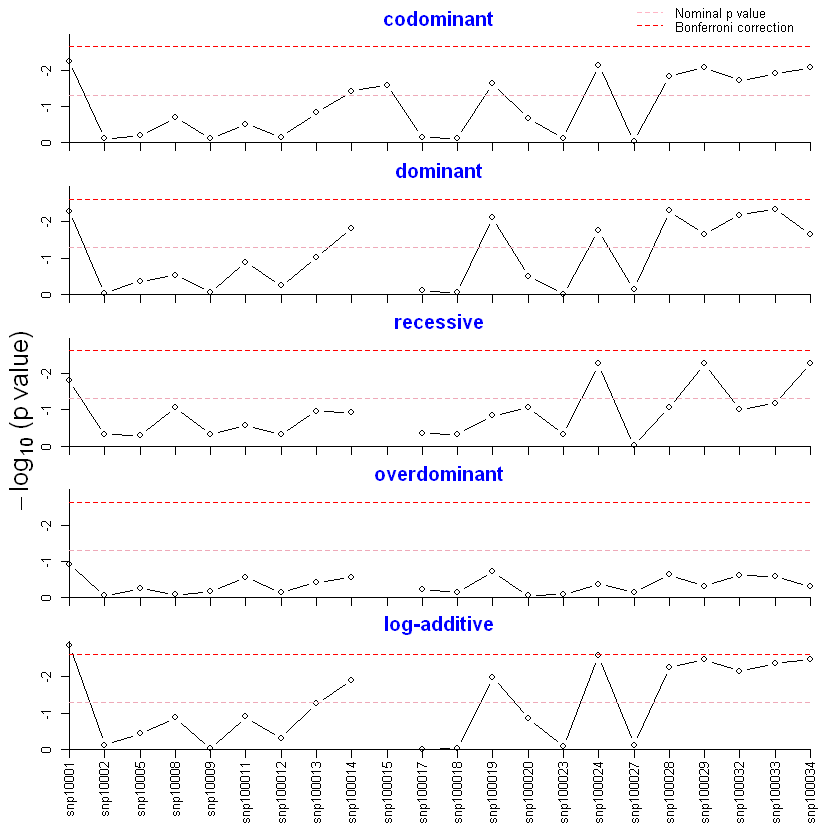

In [12]:
## Use the `WGstats` function to get the detailed result for every SNP (similar to the previous recipe)
WGstats(myres)
summary(myres)    # View the overall summary


plot(myres)  # Plot the p-values for all of the models and SNPs 
# the horizontal dashed lines (red and pink) represent two different thresholds, namely, 
# the Bonferroni correction and nominal p-value (0.05), respectively:

The plot shows the p-values for every SNP as an absolute log scale along the y axis and SNPs along the x axis. The facets represent the genetic model. The p-values presented here are equipped with the Bonferroni correction. While plotting a warning, it tells you how many SNPs are significant for every model of inheritance after the Bonferroni correction. Here, in our results, we have no significant association for the overdominant model. The plot shows the plot for the association of all SNPs in the dataset. The plot shows the log p-values to the base 10 for different models along the y axis, and the SNPs are aligned along the x axis.

In [13]:
## The `WGassociation` function performs a whole genome association analysis 
## by computing just the p-values for each SNP corresponding to the likelihood ratio test
resHapMap <- WGassociation(protein, data=mySNP, model="log")
resHapMap

,comments,log-additive
,<fct>,<dbl>
snp10001,NA,0.001403687
snp10002,NA,0.768461800
snp10003,Monomorphic,NA
snp10004,Monomorphic,NA
snp10005,NA,0.372673000
snp10006,Monomorphic,NA
snp10007,Monomorphic,NA
snp10008,NA,0.134925200
snp10009,NA,0.936159000


## 3.  The whole genome SNP association analysis

We have worked with SNP data where we had a few SNPs and made attempts to understand the phenotype dependence on these SNPs. And then we attempt to study the association analysis of a trait across the whole genome.

Use a much larger one called the `HapMap` data set, available within the `SNPassoc` package of R, to perform a whole genome association analysis for SNPs.

In [14]:
## Start with loading the `HapMap` data
library(SNPassoc)
data(HapMap)
str(HapMap)     # Check what the data looks like by looking at the first few entries with the `str` function

'data.frame':	120 obs. of  9307 variables:
 $ id        : Factor w/ 120 levels "NA06985","NA06993",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ group     : Factor w/ 2 levels "CEU","YRI": 1 1 1 1 1 1 1 1 1 1 ...
 $ rs10399749: Factor w/ 1 level "CC": 1 1 1 1 1 1 1 1 1 1 ...
 $ rs11260616: Factor w/ 3 levels "AA","AT","TT": 1 2 1 2 1 1 1 1 2 2 ...
 $ rs4648633 : Factor w/ 3 levels "CC","CT","TT": 3 2 3 3 2 3 3 2 2 NA ...
 $ rs6659552 : Factor w/ 3 levels "CC","CG","GG": 3 2 2 3 3 2 2 2 2 3 ...
 $ rs7550396 : Factor w/ 2 levels "AG","GG": 2 2 2 2 2 2 2 2 2 2 ...
 $ rs12239794: Factor w/ 1 level "GG": 1 1 1 NA 1 1 1 1 1 1 ...
 $ rs6688969 : Factor w/ 3 levels "CC","CT","TT": 1 2 2 1 2 1 2 2 1 1 ...
 $ rs10753357: Factor w/ 3 levels "AA","AC","CC": 2 1 1 2 3 3 3 3 3 2 ...
 $ rs1495243 : Factor w/ 3 levels "AA","AG","GG": 3 2 1 3 3 2 2 2 1 2 ...
 $ rs12047125: Factor w/ 1 level "GG": 1 1 1 1 1 1 1 1 1 1 ...
 $ rs780983  : Factor w/ 3 levels "CC","CT","TT": 1 2 1 1 2 2 2 1 1 1 ...
 $ rs6681520 : Factor w

In [15]:
head(HapMap[1:6])

,id,group,rs10399749,rs11260616,rs4648633,rs6659552
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,NA06985,CEU,CC,AA,TT,GG
2,NA06993,CEU,CC,AT,CT,CG
3,NA06994,CEU,CC,AA,TT,CG
4,NA07000,CEU,CC,AT,TT,GG
5,NA07022,CEU,CC,AA,CT,GG
6,NA07034,CEU,CC,AA,TT,CG


Notes: The `HapMap` data used consists of two groups of population, namely, CEU (Utah residents with ancestors from Northern and Western Europe) and YRI (Yoruba in Ibadan, Nigeria). Each group is represented by 60 samples (totally 120 samples). The form shows the head of the `HapMap` data with the sample ID group and nucleotide pairs at the SNP sites.

In [16]:
str(HapMap.SNPs.pos)
head(HapMap.SNPs.pos)
## The `HapMap.SNPs.pos` file has the genomic mapping information
## (names of SNPs, chromosomes and genetic position) for the SNPs on the human chromosomes.

'data.frame':	9305 obs. of  3 variables:
 $ snp       : chr  "rs10399749" "rs11260616" "rs4648633" "rs6659552" ...
 $ chromosome: chr  "chr1" "chr1" "chr1" "chr1" ...
 $ position  : int  45162 1794167 2352864 2902617 3170389 3382844 3766548 4038743 4246260 4387131 ...


,snp,chromosome,position
,<chr>,<chr>,<int>
1,rs10399749,chr1,45162
2,rs11260616,chr1,1794167
3,rs4648633,chr1,2352864
4,rs6659552,chr1,2902617
5,rs7550396,chr1,3170389
6,rs12239794,chr1,3382844


In [18]:
## Create the `SNP` class object, run the `WGassociation` function on this data object for the genetic model of your interest 
myHapMap <- setupSNP(HapMap, colSNPs= 3:9307, sort=TRUE,
                     info=HapMap.SNPs.pos,sep="")
myHapMapres <- WGassociation(group, data= myHapMap, model="dominant")

# The result is a data frame. Check the resulting data frame
head(myHapMapres)
print(head(myHapMapres))

,comments,dominant
,<fct>,<dbl>
rs10399749,Monomorphic,NA
rs11260616,NA,9.850780e-02
rs4648633,NA,6.550480e-08
rs6659552,NA,1.175992e-10
rs7550396,NA,1.000000e+00
rs12239794,Monomorphic,NA


           comments    dominant
rs10399749 Monomorphic -       
rs11260616 -           0.09851 
rs4648633  -           0.00000 
rs6659552  -           0.00000 
rs7550396  -           1.00000 
rs12239794 Monomorphic -       
